## 0 - Motivation
Title: Exoplanet Mass Regression and OOD analysis

Motivation: I wanted to conduct some sort of analysis on the NASA exoplanet dataset

Process:
- Load NASA Exoplanets dataset and preprocess
- Explore planet features and distributions
- Define OOD scenarios for modeling
- Conduct uncertainty-aware predictive analysis
- Visualize results

In [ ]:
# Set root folder context
import os
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))
os.chdir(PROJECT_ROOT)

In [11]:
# Imports
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Local imports
from src.utils import print_data_summary
from src.data_processing import load_exoplanet_data

## 1 - Data Exploration

### Load Data

In [ ]:
# load_exoplanet_data loads the file and drops rows with missing mass values, so we can directly work with the cleaned dataset.
# Original file can be found at https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars
planets=load_exoplanet_data()

In [6]:
print_data_summary(planets)

Data Summary:
Total records: 6064
Columns: ['rowid', 'pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name', 'tic_id', 'gaia_dr2_id', 'gaia_dr3_id', 'sy_snum', 'sy_pnum', 'sy_mnum', 'cb_flag', 'discoverymethod', 'disc_year', 'disc_refname', 'disc_pubdate', 'disc_locale', 'disc_facility', 'disc_telescope', 'disc_instrument', 'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag', 'ast_flag', 'obm_flag', 'micro_flag', 'etv_flag', 'ima_flag', 'dkin_flag', 'pl_controv_flag', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbper_reflink', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_orbsmax_reflink', 'pl_angsep', 'pl_angseperr1', 'pl_angseperr2', 'pl_angseplim', 'pl_angsep_reflink', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_rade_reflink', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_radj_reflink', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmasse_reflink', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassj

### Target Exploration

Explore the planet mass field (in Earth masses)

In [7]:
target="pl_bmasse"

count    6064.000000
mean      403.886242
std      1143.010525
min         0.020000
25%         4.187500
50%         9.200000
75%       188.234581
max      9534.852210
Name: pl_bmasse, dtype: float64


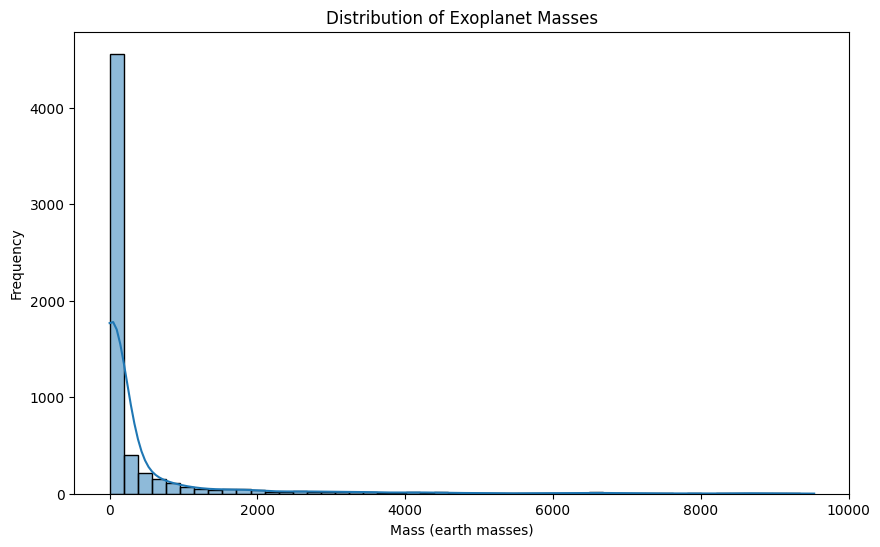

In [9]:
print(planets[target].describe())
plt.figure(figsize=(10,6))
sns.histplot(planets[target].dropna(), bins=50, kde=True)
plt.xlabel("Mass (earth masses)")
plt.ylabel("Frequency")
plt.title("Distribution of Exoplanet Masses")
plt.show()

Since the distribution is heavily skewed, we check the logarithmic scale

count    6064.000000
mean      403.886242
std      1143.010525
min         0.020000
25%         4.187500
50%         9.200000
75%       188.234581
max      9534.852210
Name: pl_bmasse, dtype: float64


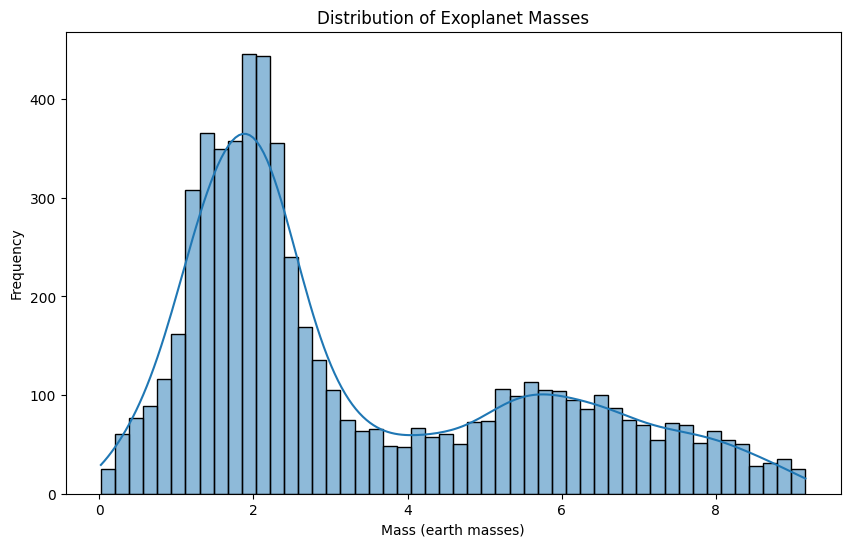

In [ ]:
print(planets[target].describe())
plt.figure(figsize=(10,6))
sns.histplot(np.log1p(planets[target].dropna()), bins=50, kde=True)
plt.xlabel("Mass (earth masses)")
plt.ylabel("Frequency")
plt.title("Distribution of Exoplanet Masses (Logarithmic Scale)")
plt.show()

### Exploring remaining features

In [17]:
print(*planets.columns.tolist(), sep=",")

rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbper_reflink,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmax_reflink,pl_angsep,pl_angseperr1,pl_angseperr2,pl_angseplim,pl_angsep_reflink,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_rade_reflink,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radj_reflink,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmasse_reflink,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassj_reflink,pl_bmassprov,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_dens_reflink,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccen_reflink,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_

In [18]:
names=['pl_name','hostname']

In [ ]:
candidate_features=[
    'pl_orbper',  # Orbital period (days)
    'pl_rade',    # Planet radius (Earth radii)
    'pl_orbeccen', # Orbital eccentricity
    'pl_obsmax',   # Semi-major axis (AU)
    
    'st_rad',    # Stellar radius (Solar radii)
    'st_teff',   # Stellar effective temperature (K)
    'st_mass',   # Stellar mass (Solar masses)
]